In [1]:
import pyautogui
from screeninfo import get_monitors
from time import sleep

In [2]:
# This section gets the main monitor's features (x and y start position, width and height).

monitor = get_monitors()[0]
main_screen = (monitor.x, monitor.y, monitor.width, monitor.height)
print(main_screen)

(0, 0, 1920, 1080)


In [4]:
# Show a screenshot, proving the retrieved features are corrects.

monitor_screen = pyautogui.screenshot(region=main_screen)
monitor_screen.show()

In [4]:
# Find the stats boxes cordinates.

localisation4Boxes = pyautogui.locateOnScreen('./images/Positions/Positions.png', region=main_screen)
print(localisation4Boxes)

None


In [5]:
# Find the tab coordinates (Sword and Shield).

localisationTabs = pyautogui.locateOnScreen('./images/Positions/Tabs.png', region=main_screen)
print(localisationTabs)

None


In [7]:

localisationRetry = pyautogui.locateOnScreen('./images/Retry.png', region=main_screen)
print(localisationRetry)

#(1542, 1567, 346, 180)

# Box(left=771, top=783, width=174, height=95)

#29/06/2023
#Box(left=771, top=784, width=173, height=90)

Box(left=771, top=784, width=173, height=90)


In [16]:
#sleep(6)
localisationDiamond = pyautogui.locateOnScreen('./images/DiamondPopUp2.png', region=main_screen)
print(localisationDiamond)

#(686,395,132,81)

#29/06/2023
#Box(left=689, top=364, width=129, height=75)

Box(left=689, top=364, width=129, height=75)


In [21]:
5382 - main_screen[0]

1542

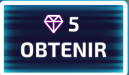

In [17]:
#sleep(5)
diamond = (689,364,129,75)
# (A, B, C, D)

pyautogui.screenshot(region=diamond)

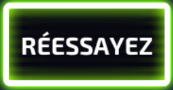

In [21]:
retry = (771,784,173,90)
pyautogui.screenshot(region=retry)

In [24]:
print(1542 / 2)
print(1567 / 2)

771.0
783.5


In [25]:
stat_box_width = 532 / 2
stat_box_height = 215 / 2

X_stat_box = main_screen[0] + 1385 / 2
Y_stat_box = 1380 / 2

stride = 5

X_retry = main_screen[0] + 1542 / 2
Y_retry = 1567 / 2

# A
X_diamond_local = 689
# B
Y_diamond_local = 364
# C
Diamond_width = 129
# D
Diamond_height = 75

Retry_width = 173
Retry_height = 90

X_diamond = main_screen[0] + X_diamond_local
Y_diamond = Y_diamond_local

# loc variables contain starting X and Y, then Width and Height of the box.
locTL = (X_stat_box + stat_box_width / 2, Y_stat_box + 30, stat_box_width / 2 - 15, stat_box_height - 45)
# center variables contains the center of the boxes, to click later when needed.
centerTL = (X_stat_box + stat_box_width / 2, Y_stat_box + stat_box_height / 2)

locTR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box + 29, stat_box_width / 2 - 15, stat_box_height - 45)
centerTR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box + stat_box_height / 2) 

locBR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box + stat_box_height + 35, stat_box_width / 2 - 40, stat_box_height - 45)
centerBR = (X_stat_box + stat_box_width + stride + stat_box_width / 2, Y_stat_box + stat_box_height + stat_box_height / 2)

# Need to find the Sword, Shield, Star position and centers. Same proccess than before.
X_tab_box = main_screen[0] + 1357 / 2
Y_tab_box = 1973 / 2

tab_box_width = 279.5 / 2
tab_box_height = 106 / 2

locSword = (X_tab_box, Y_tab_box, tab_box_width, tab_box_height)
centerSword = (X_tab_box + tab_box_width / 2, Y_tab_box + tab_box_height / 2)

locShield = (X_tab_box + tab_box_width + stride / 4, Y_tab_box, tab_box_width, tab_box_height)
centerShield = (X_tab_box + tab_box_width + stride / 4 + tab_box_width / 2, Y_tab_box + tab_box_height / 2)

locRetry = (X_retry, Y_retry, Retry_width, Retry_height)
centerRetry = (X_retry + Retry_width / 4, Y_retry + Retry_height / 4)

locDiamond = (X_diamond, Y_diamond, Diamond_width, Diamond_height)
centerDiamond = (X_diamond_local + Diamond_width / 2, Y_diamond_local + Diamond_height / 2)

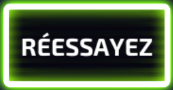

In [26]:
pyautogui.screenshot(region=locRetry)


In [5]:
def click(item):
    pyautogui.click(x=item[0], y=item[1], clicks=1, button='left')

In [30]:
click(centerSword)
sleep(1)
click(centerRetry)

In [11]:
sleep(5)
click(centerDiamond)

In [10]:
screen_to_ocr = pyautogui.screenshot(region=locTL, imageFilename="./images/image_to_ocr.png")
screen_to_ocr.show()

In [13]:
from PIL import Image

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [15]:
# In the case of "Dégats" we have to make this little processing.

screen_to_ocr = pyautogui.screenshot(region=locTL)

Degats_OCR = pytesseract.image_to_string(screen_to_ocr)

Degats_OCR = Degats_OCR.split("\n")[:2]


Degats_OCR = [i.replace(',', '.') for i in Degats_OCR]
Degats_OCR = [i.replace('$ ', '') for i in Degats_OCR]

print(Degats_OCR)


['20.73K', '$16.39K']


In [33]:
def letter_to_number(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 1000

    if 'M' in x:       
        return float(x.replace('M', '')) * 1000000

In [50]:
Degats_OCR = list(map(letter_to_number, Degats_OCR))
print(Degats_OCR)

[20730.0, 16390.0]


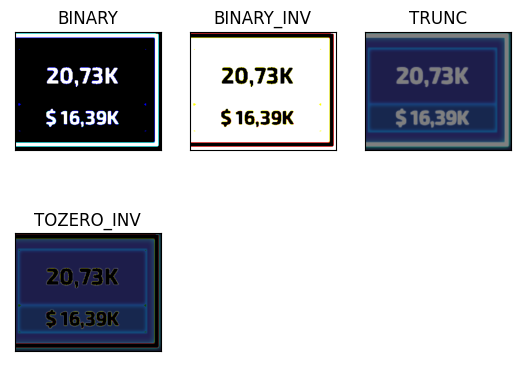

In [28]:
# In the case of "PV" we have to make this little processing.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

titles = ['BINARY','BINARY_INV','TRUNC','TOZERO_INV']

screen_to_ocr = pyautogui.screenshot(region=locTL)
screen_to_ocr = np.array(screen_to_ocr)

images = []

threshs = [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO_INV]

for t in threshs:
    res, thresh = cv.threshold(screen_to_ocr,127,255, t)
    images.append(thresh)

for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# screen_to_ocr.show()
# Pv_OCR = pytesseract.image_to_string(screen_to_ocr)
# print(Pv_OCR)

# Split accordingly.

#..._OCR = ..._OCR.split("\n")[:2]

#..._OCR = [i.replace(',', '.') for i in ..._OCR]
#..._OCR = [i.replace('$ ', '') for i in ..._OCR]

#print(..._OCR)

In [29]:
for i in images:
   
    print(pytesseract.image_to_string(i))


    

20,73K
EB [Reh] 4

 

20,73K
$ 16,39K

 

20,73K
eT) 4

 




In [36]:
# In the case of "PV" we have to make this little processing.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

screen_to_ocr = pyautogui.screenshot(region=locTR)
screen_to_ocr = np.array(screen_to_ocr)

res, thresh_image = cv.threshold(screen_to_ocr,127,255, cv.THRESH_BINARY_INV)
OCRed = pytesseract.image_to_string(thresh_image)

print(OCRed)


10,51



In [ ]:
# We can now make logical comparisons and act accordingly.

In [12]:
sleep(5)
pyautogui.locateOnScreen('./images/DiamondPopUp.png', region=locDiamond)

Box(left=686, top=395, width=132, height=81)

In [6]:

pyautogui.locateOnScreen('./images/Tournament.png', region=main_screen)


Box(left=877, top=609, width=165, height=86)

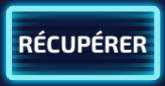

In [7]:
locTournament = (877,609,165,86)
pyautogui.screenshot(region=locTournament)

In [8]:
pyautogui.locateOnScreen('./images/Start.png', region=main_screen)

Box(left=822, top=772, width=280, height=112)

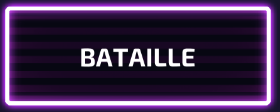

In [9]:
locStart = (822,772,280,112)
pyautogui.screenshot(region=locStart)